In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADYEY', 'AMD', 'AMZN', 'ANET', 'APPH',
    'AXON', 'BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD', 'DDOG',
    'DKNG', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT',
    'FUV', 'FVRR', 'GH', 'GMED', 'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD',
    'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA',
    'NYT', 'OKTA', 'OPEN', 'PANW', 'PINS', 'PTON', 'QDEL', 'RBLX',
    'RDFN', 'RGEN', 'ROKU', 'RVLV', 'SE', 'SHOP', 'SNOW', 'SPLK', 'SQ',
    'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

71

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-05-21', datetime.date(2022, 5, 21))

In [5]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  74 of 74 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADYEY
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCS
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [6]:
data['Date'].tail()

2513   2022-05-16
2514   2022-05-17
2515   2022-05-18
2516   2022-05-19
2517   2022-05-20
Name: Date, dtype: datetime64[ns]

In [7]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.000486
2       1.001694
3       1.001380
4       0.997834
5       1.011079
          ...   
2513    0.996054
2514    1.020170
2515    0.959605
2516    0.994166
2517    1.000146
Name: ^GSPC, Length: 2517, dtype: float64

In [8]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.001767
2,1.024467
3,1.001414
4,1.002233
5,1.024896
...,...
2513,0.991064
2514,1.050127
2515,0.970581
2516,1.056860


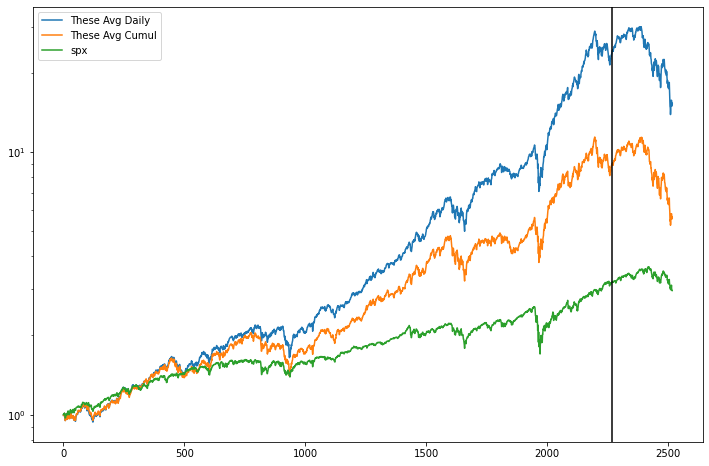

In [9]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [10]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-05-21,NaN,NaN
1,2012-05-22,0.992486,0.992486
2,2012-05-23,1.005783,1.006061
3,2012-05-24,1.002703,1.002919
4,2012-05-25,0.998023,0.998703


In [11]:
out.tail()

,Date,mine1,mine2
2513,2022-05-16,15.162195,5.615600
2514,2022-05-17,15.702266,5.818052
2515,2022-05-18,14.916463,5.541060
2516,2022-05-19,15.364656,5.677742
2517,2022-05-20,15.267526,5.622384


In [12]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [13]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

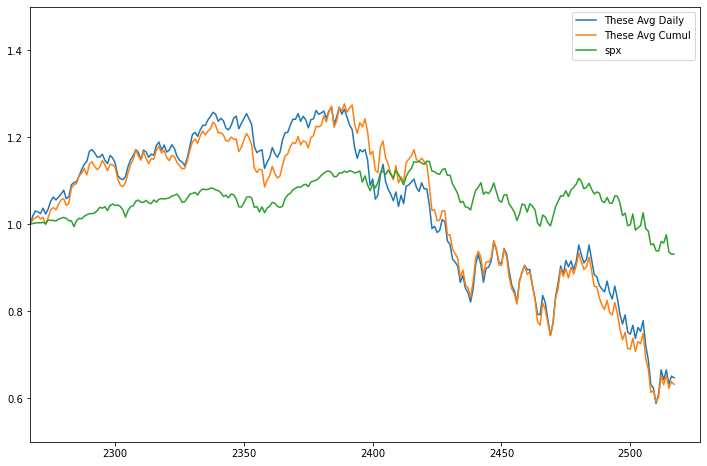

In [14]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.5, 1.5)
plt.legend();

In [15]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [16]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1364,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1365,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1366,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1367,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1368,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [17]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1364,16.26,16.26,16.990,14.00
1365,15.26,15.26,16.399,15.12
1366,15.24,15.24,15.860,14.77
1367,13.73,13.73,15.430,13.62
1368,14.02,14.02,14.160,13.81


In [18]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1364,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1365,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1366,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1367,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1368,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.989553
Name: HighMult, dtype: float64


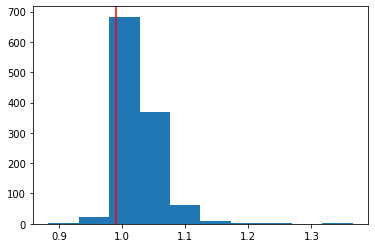

In [19]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0146034007757117


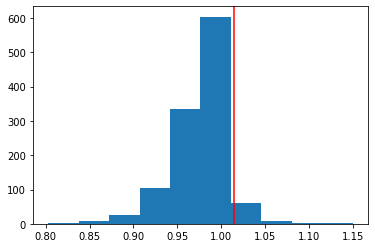

In [20]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [21]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [22]:
get_hilo_mult(rblx)

(1.0146034007757117, 0.989553007405076)

In [23]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0081245098175693, 0.9942502043830153)

In [24]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [25]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1364,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1365,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1366,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1367,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1368,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [26]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [27]:
get_hilo_mults(rblx)

(1.011150506743483, 0.9908161082416418, 1.0177439618628619, 0.9880190723630928)

In [28]:
get_hilo_mults(aapl)

(1.0061293430566498,
 0.9956545902680937,
 1.0095022888481566,
 0.9928307865381356)

In [29]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006129,0.995655,1.009502,0.992831
1,ABMD,1.003983,0.997447,1.004752,0.996690
2,ABNB,1.006000,0.994581,1.011604,0.984079
3,ADYEY,1.023313,0.981765,1.029146,0.968002
4,AMD,1.011726,0.992507,1.011175,0.991191


In [30]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,137.589996,AAPL
ABMD,235.75,ABMD
ABNB,112.550003,ABNB
ADYEY,15.49,ADYEY
AMD,93.5,AMD
...,...,...
ZEN,98.959999,ZEN
ZNGA,8.18,ZNGA
^GSPC,3901.360107,^GSPC
^IXIC,11354.617188,^IXIC


In [31]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006129,0.995655,1.009502,0.992831,137.589996
1,ABMD,1.003983,0.997447,1.004752,0.996690,235.75
2,ABNB,1.006000,0.994581,1.011604,0.984079,112.550003
3,ADYEY,1.023313,0.981765,1.029146,0.968002,15.49
4,AMD,1.011726,0.992507,1.011175,0.991191,93.5


In [32]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv